In [1]:
#ce code est une implementation de l'algorithme de classification K-nn 
#sur une petite base de données . en utilisant la distance eucledienne
#travail fait par BENALI SAMY //// SLIMANI IKRAM 
#veuillez vous assurez que le fichier fonction.py soit dans le meme dossier que le fichier de ce code mainproject

from fonction import loadDataset , euclideanDistance , getNeighbors , getResponse , getAccuracy , manhattanDistance ,getNeighborsM
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Fonction principale utilisant la distance euclidienne 
def maineucli():
    # Initialisation des ensembles d'entraînement et de test
    trainingSet = []
    testSet = []

    # Chargement des données du fichier 'iris.data.csv'
    loadDataset('iris.data.csv', 0.66, trainingSet, testSet)
    print('Train: ' + repr(len(trainingSet)))
    print('Test: ' + repr(len(testSet)))
    predictions = []
    actual_labels = []
    k = 3

    # Faire des prédictions pour chaque instance de l'ensemble de test
    for x in range(len(testSet)):
         neighbors = getNeighbors(trainingSet, testSet[x], k)
         result = getResponse(neighbors)
         predictions.append(result)
         actual_labels.append(testSet[x][-1])  # Ajouter l'étiquette actual
         print('> Predicted=' + repr(result) + ', Actual=' + repr(testSet[x][-1]))

    # Ajout des prédictions à  notre ensemble de test
    testSetWithPredictions = [testSet[i] + [predictions[i]] for i in range(len(testSet))]

    # Calculer et afficher la précision des prédictions
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')

    # Calculer et afficher la matrice de confusion
    cm = confusion_matrix(actual_labels, predictions)
    print("\nConfusion Matrix:")
    print(np.array2string(cm, separator=', '))

    # Afficher une  matrice de confusion
    classes = ['setosa', 'versicolor', 'virginica']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Comparer les comptes de classes réelles et prédites avec un diagramme en barres
    unique_labels = set(actual_labels + predictions)
    unique_labels = sorted(list(unique_labels))

    actual_counts = [actual_labels.count(label) for label in unique_labels]
    predicted_counts = [predictions.count(label) for label in unique_labels]

    bar_width = 0.35
    index = np.arange(len(unique_labels))

    fig, ax = plt.subplots()
    bar1 = ax.bar(index, actual_counts, bar_width, label='Actual')
    bar2 = ax.bar(index + bar_width, predicted_counts, bar_width, label='Predicted')

    ax.set_xlabel('Classes')
    ax.set_ylabel('Counts')
    ax.set_title('Comparison of Actual and Predicted Classes')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(unique_labels)
    ax.legend()

    plt.show()


Train: 101
Test: 48
Distance: 3.4641016151377544
Distance: 6
test du plus proche voisin est : [[4, 4, 4, 'b']]
test du plus proche voisin est : [[4, 4, 4, 'b']]
teste de la réponse : a
teste de la fonction précision : 66.66666666666666


In [2]:
# Fonction principale utilisant la distance de manhattan
def mainmanhattan():
    # Initialisation des ensembles d'entraînement et de test
    trainingSet = []
    testSet = []

    # Chargement des données du fichier 'iris.data.csv'
    loadDataset('iris.data.csv', 0.66, trainingSet, testSet)
    print('Train: ' + repr(len(trainingSet)))
    print('Test: ' + repr(len(testSet)))
    predictions = []
    actual_labels = []
    k = 3

    # Faire des prédictions pour chaque instance de l'ensemble de test
    for x in range(len(testSet)):
         neighbors = getNeighborsM(trainingSet, testSet[x], k)
         result = getResponse(neighbors)
         predictions.append(result)
         actual_labels.append(testSet[x][-1])  # Ajouter l'étiquette actual
         print('> Predicted=' + repr(result) + ', Actual=' + repr(testSet[x][-1]))

    # Ajout des prédictions à  notre ensemble de test
    testSetWithPredictions = [testSet[i] + [predictions[i]] for i in range(len(testSet))]

    # Calculer et afficher la précision des prédictions
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')

    # Calculer et afficher la matrice de confusion
    cm = confusion_matrix(actual_labels, predictions)
    print("\nConfusion Matrix:")
    print(np.array2string(cm, separator=', '))

    # Afficher une  matrice de confusion
    classes = ['setosa', 'versicolor', 'virginica']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Comparer les comptes de classes réelles et prédites avec un diagramme en barres
    unique_labels = set(actual_labels + predictions)
    unique_labels = sorted(list(unique_labels))

    actual_counts = [actual_labels.count(label) for label in unique_labels]
    predicted_counts = [predictions.count(label) for label in unique_labels]

    bar_width = 0.35
    index = np.arange(len(unique_labels))

    fig, ax = plt.subplots()
    bar1 = ax.bar(index, actual_counts, bar_width, label='Actual')
    bar2 = ax.bar(index + bar_width, predicted_counts, bar_width, label='Predicted')

    ax.set_xlabel('Classes')
    ax.set_ylabel('Counts')
    ax.set_title('Comparison of Actual and Predicted Classes')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(unique_labels)
    ax.legend()

    plt.show()

Train: 89
Test: 60
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-set

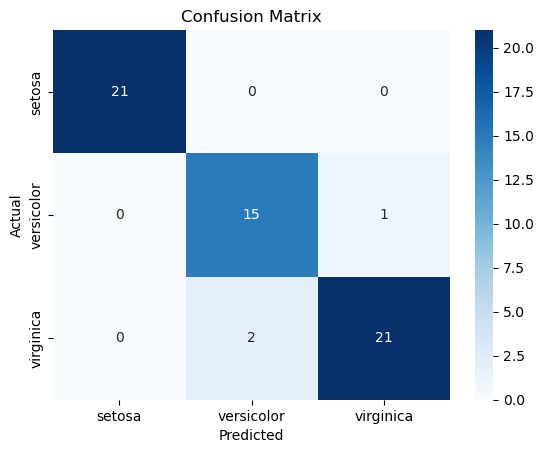

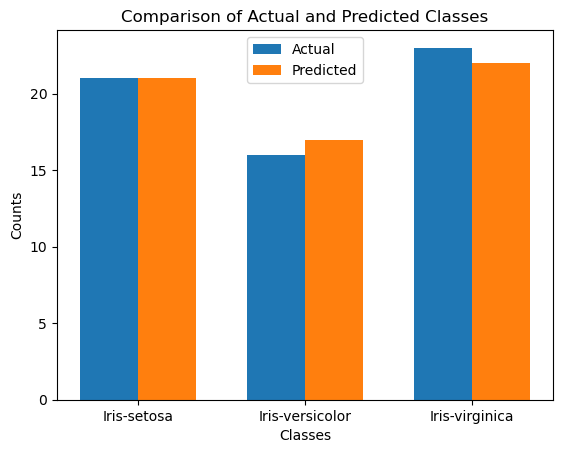

In [3]:
#appel de la fonction mainmanhattan
mainmanhattan()


Train: 91
Test: 58
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-setosa', Actual='Iris-setosa'
> Predicted='Iris-versicolor', Actual='Iris-versicolor'
> Predicted='Iris-versicolor', Actual='Iris-versicolor'
> Predicted='Iris-versicolor', Actual='Iris-versicolor'
> Predicted='Iris-versicolor', Actual='Iris-v

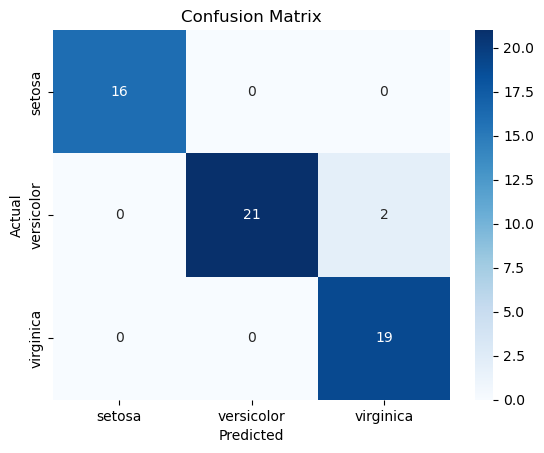

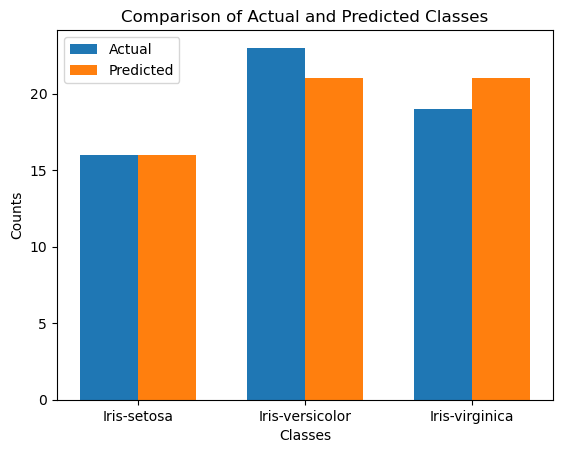

In [4]:
#appel de la fonction maineucli 
maineucli()